In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [2]:
khushi_df = pd.read_csv('C:/Users/akhus/Downloads/water_potability.csv')

In [3]:
khushi_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

    These columns are the physicochemical features and the target variable i.e., potability (0 for not potable and 1 for potable water).

In [4]:
#displaying information about the water potability dataset
khushi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#descriptive statistics of the dataset
khushi_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
#checking for null and invalid values
khushi_df.isin([np.inf, -np.inf, np.nan]).sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#fill the nan values with mean
khushi_df.fillna(khushi_df.mean(), inplace=True)

In [8]:
#check for duplicated values
khushi_df.duplicated().sum()

np.int64(0)

 Analytical Plots

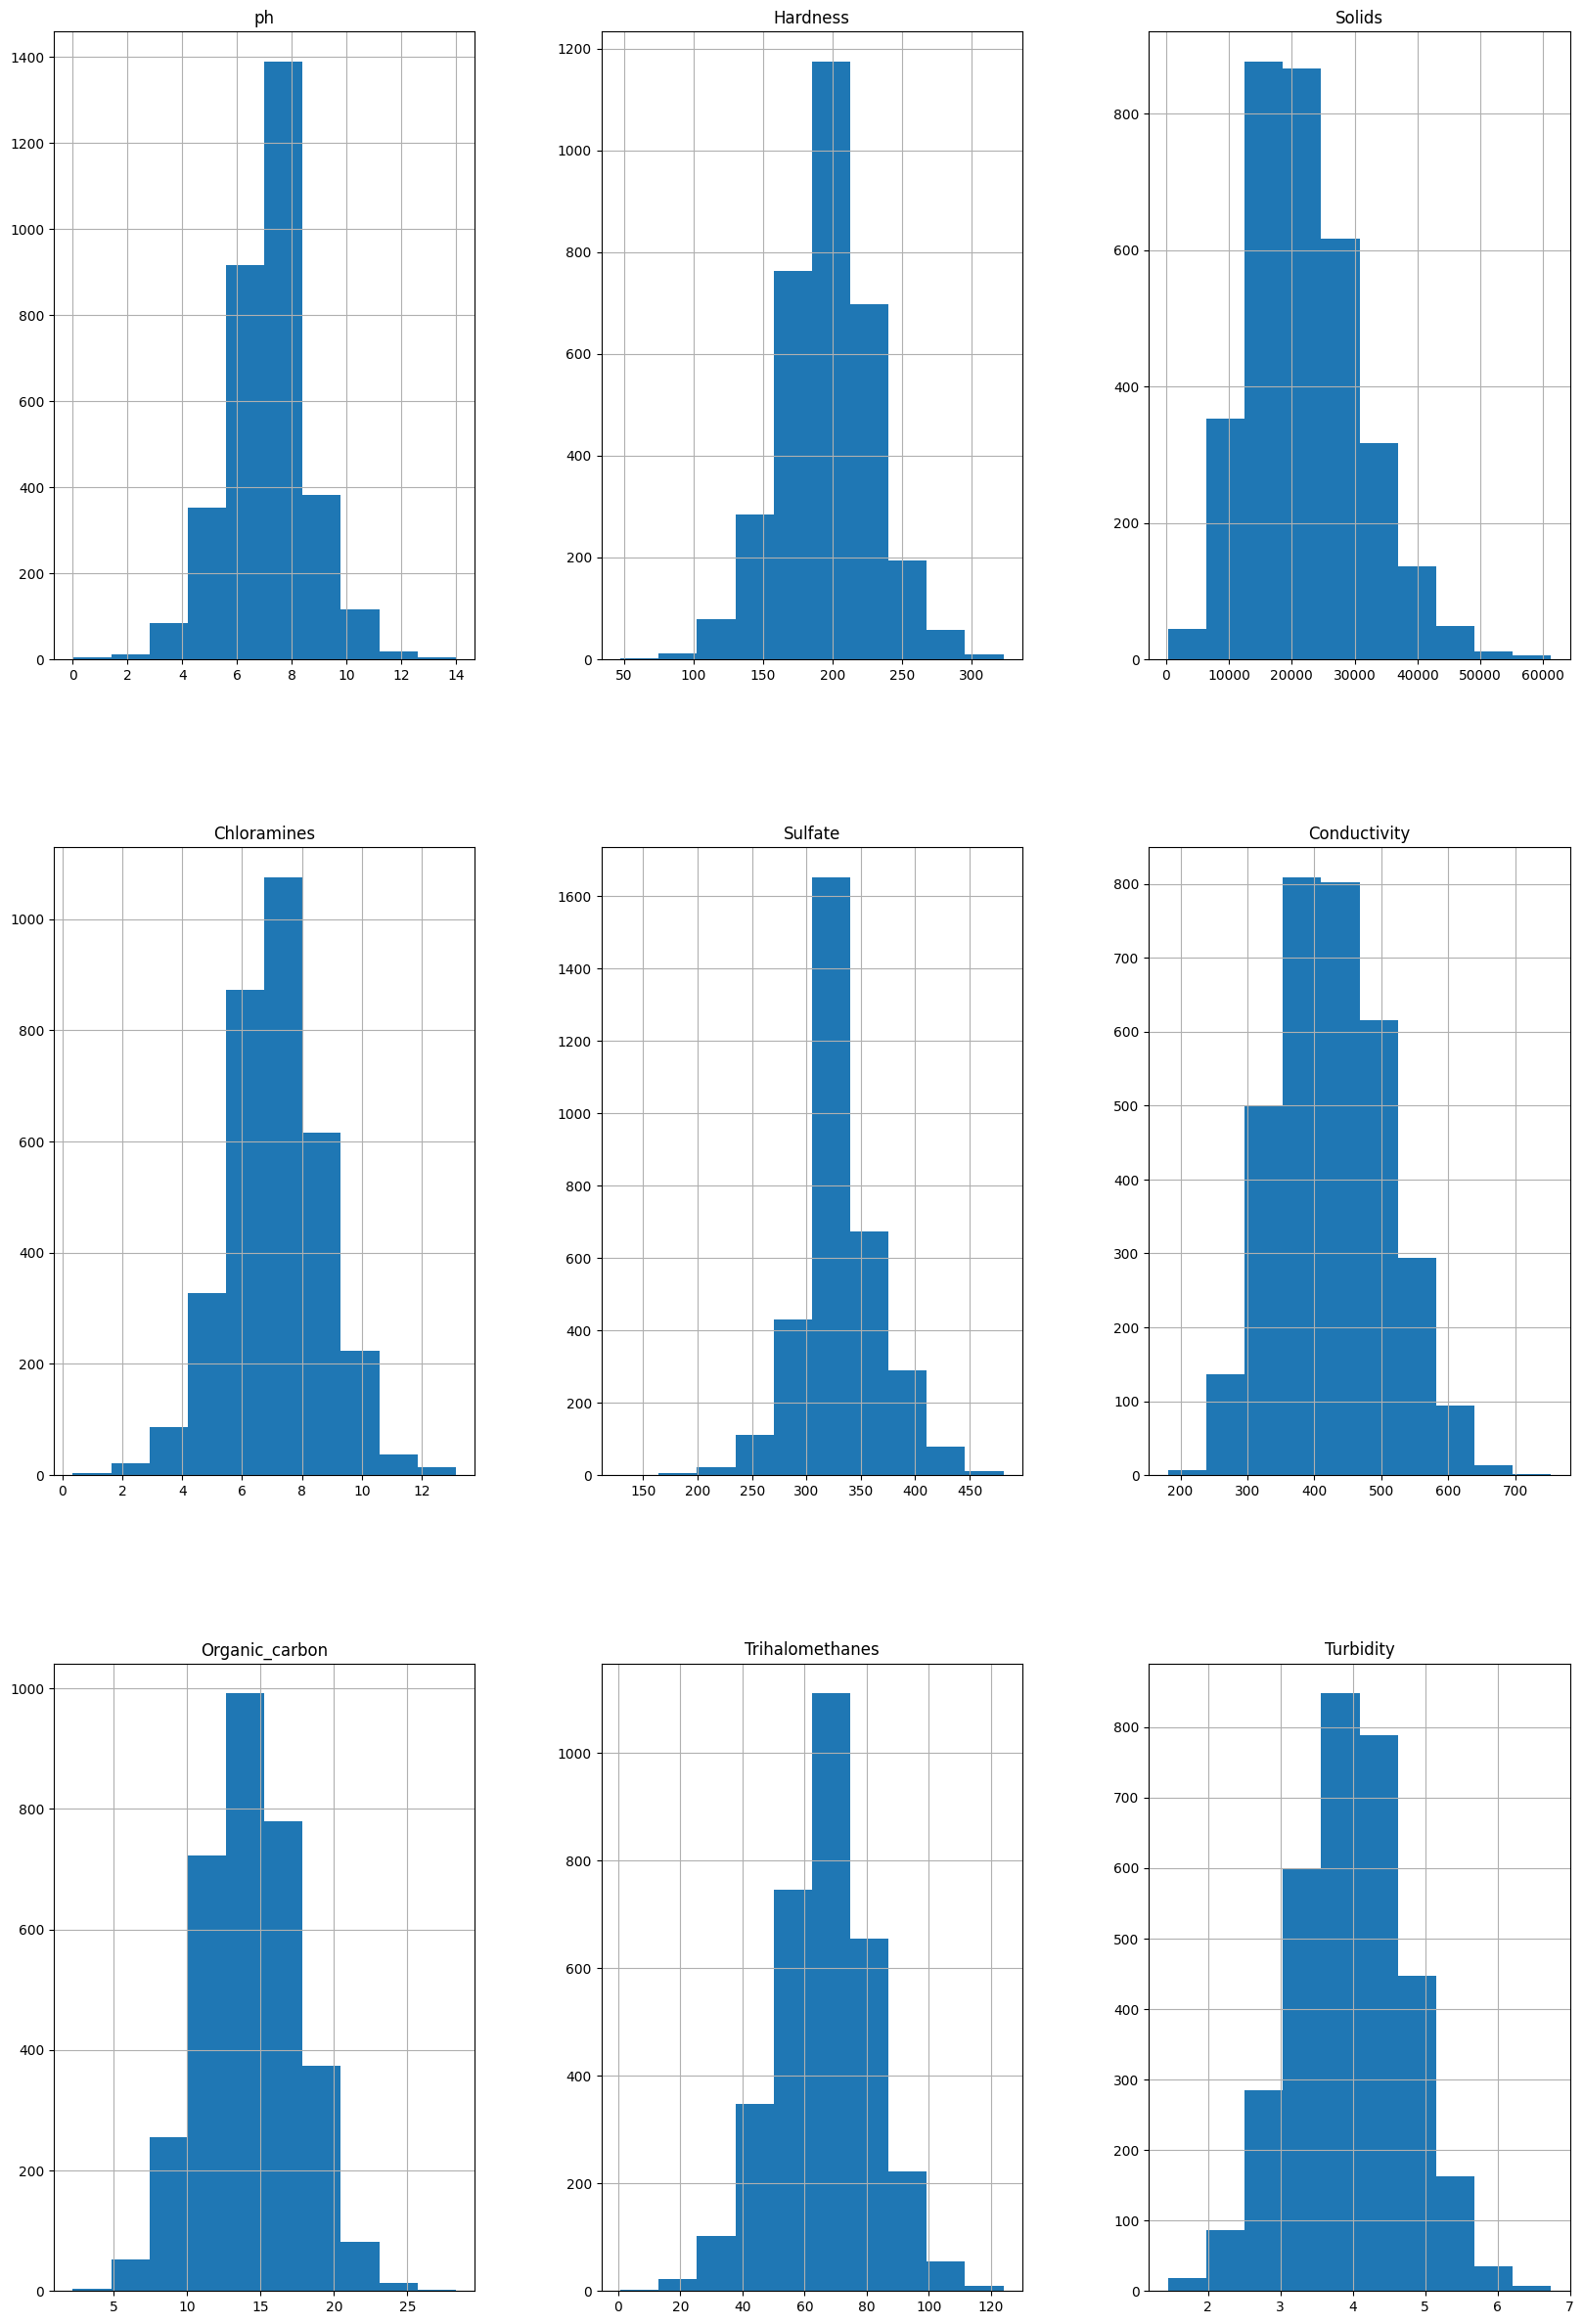

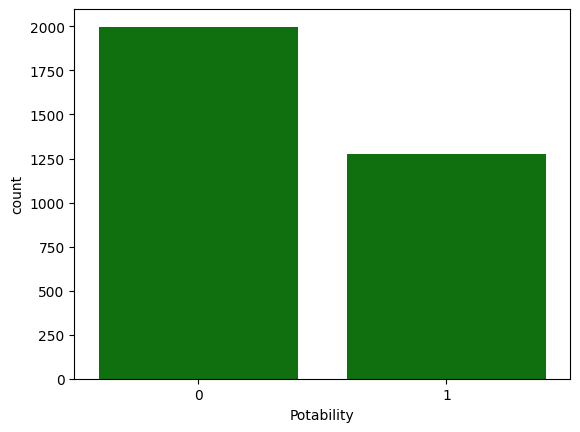

In [62]:
# Univariate Analysis

# Histograms for each numerical feature
khushi_df.drop(columns=['Potability']).hist(figsize=(20, 30))
plt.show()

# Bar plot for 'Potability' distribution
sns.countplot(x='Potability', data=khushi_df, color='green')
plt.show()

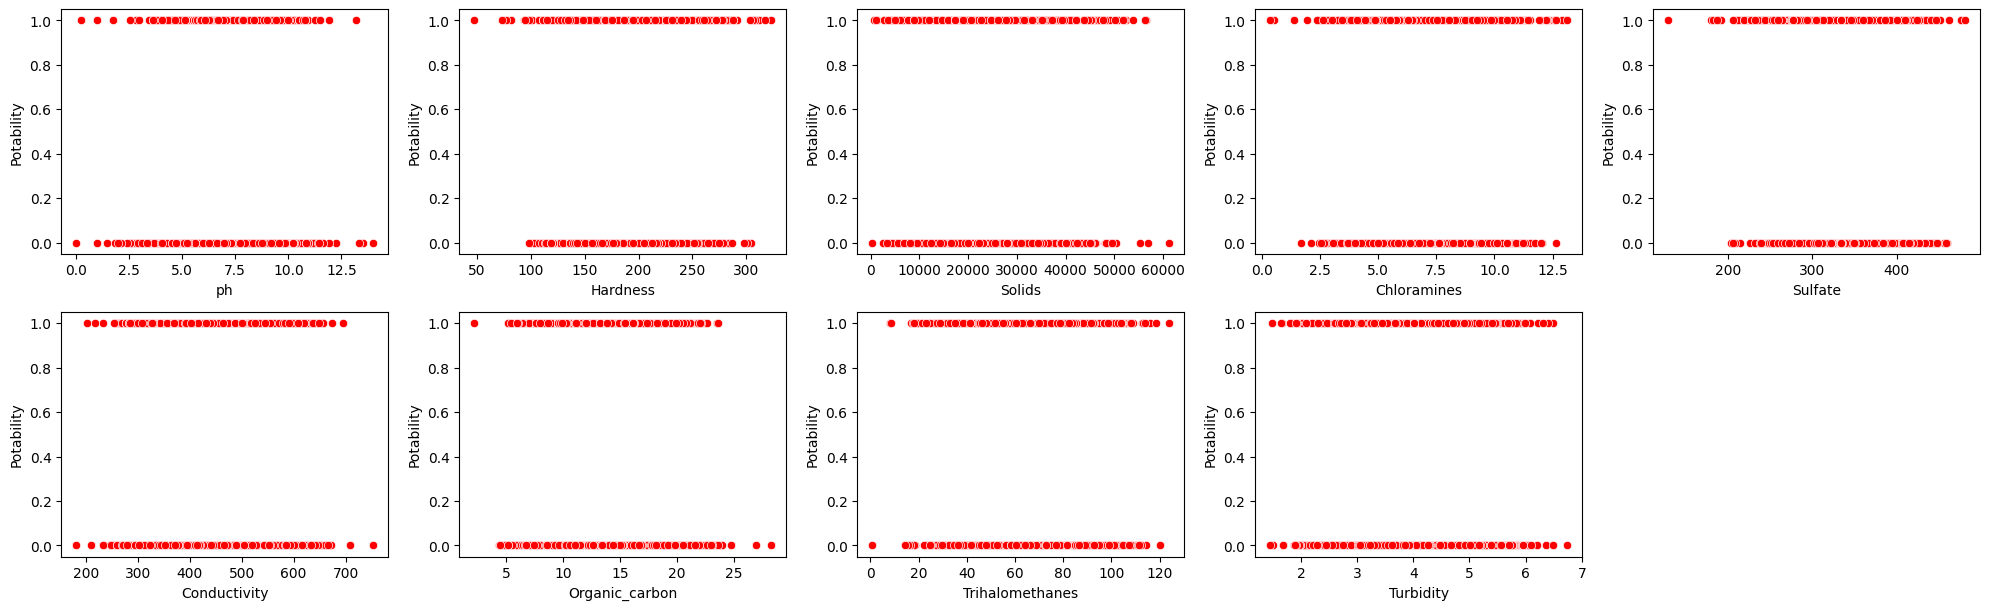

In [66]:
# Bivariate Analysis
# Scatter plots for relationship between features and 'Potability'
plt.figure(figsize=(20, 30))
for i, col in enumerate(khushi_df.columns[:-1]):
    plt.subplot(10, 5, i+1)
    sns.scatterplot(x=col, y='Potability', data= khushi_df, color='red')
plt.tight_layout()
plt.show()
     

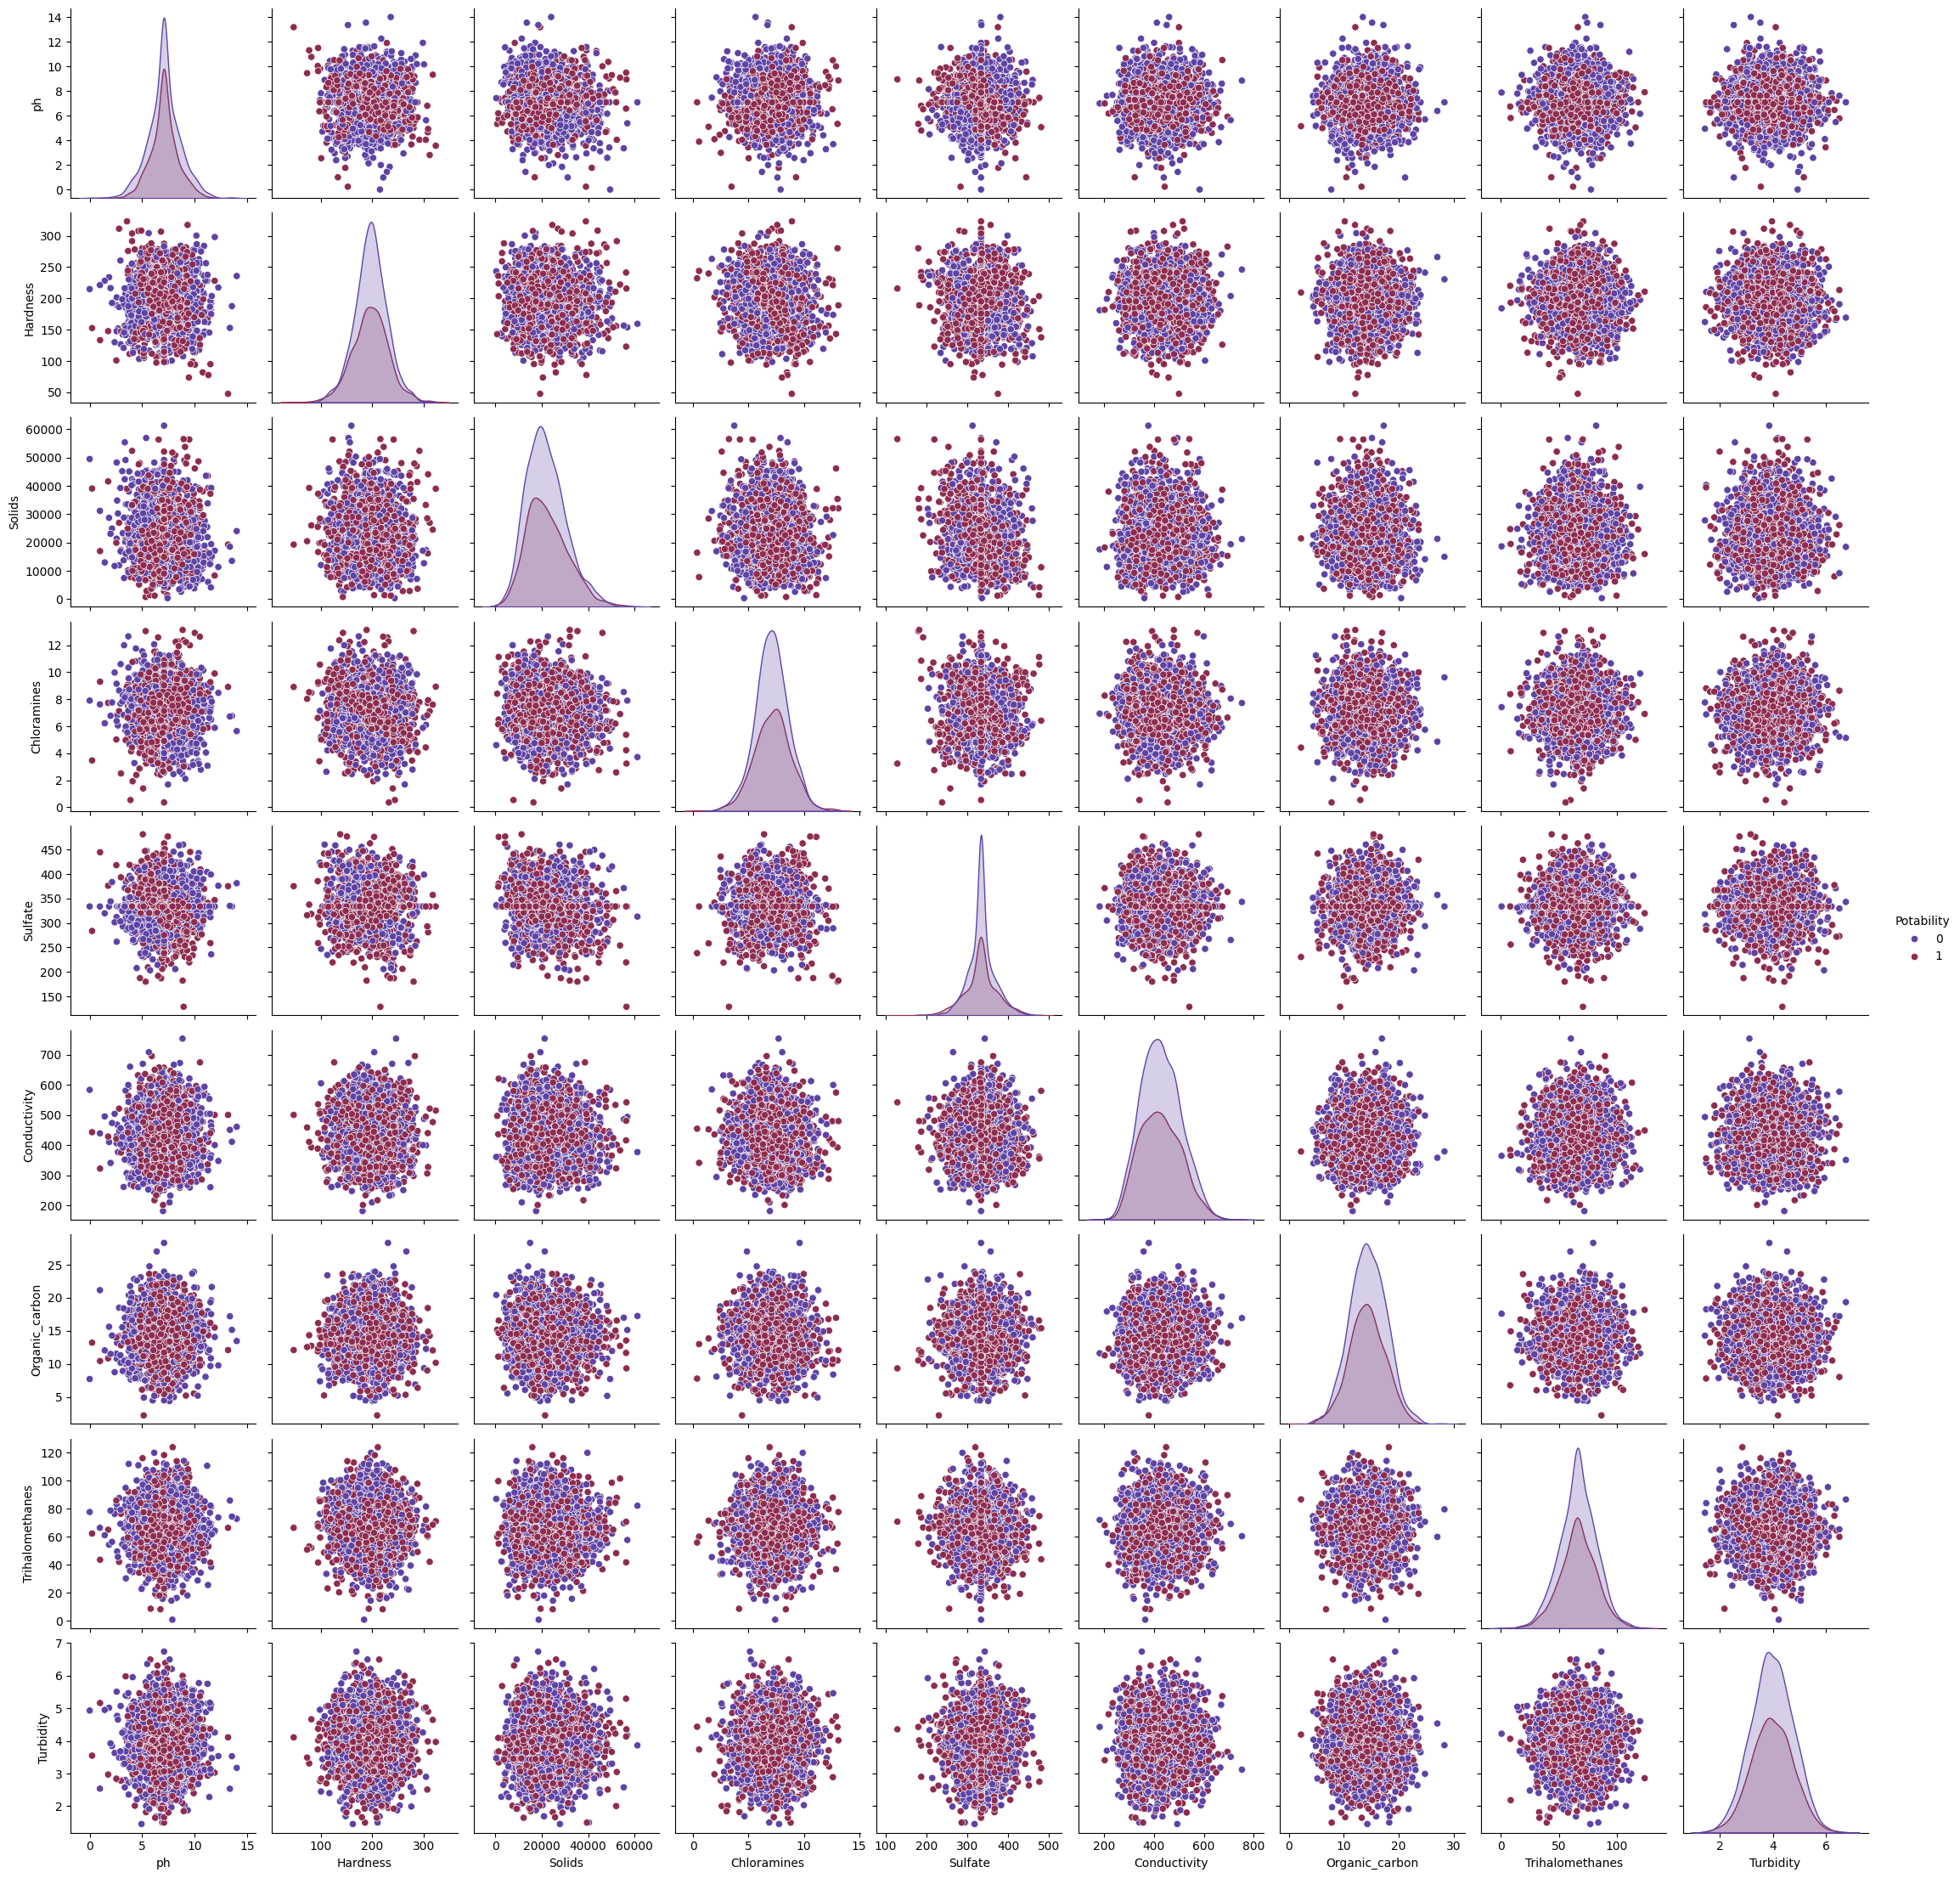

In [59]:
#multivariate analysis
sns.pairplot(khushi_df, hue='Potability',palette="twilight" )

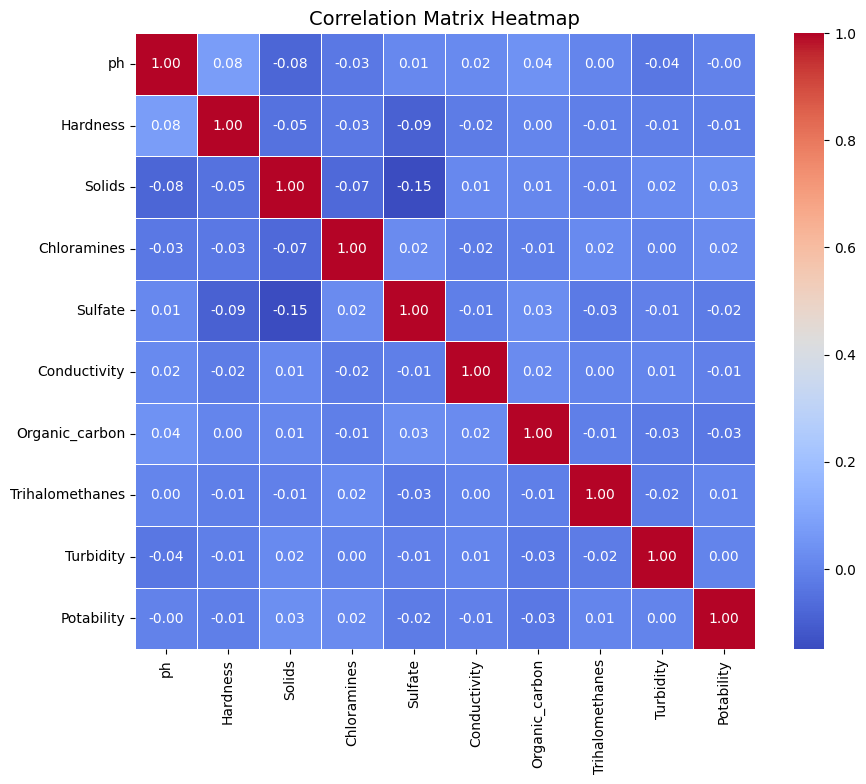

In [60]:
#Correlation heatmap
corr_matrix = khushi_df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()

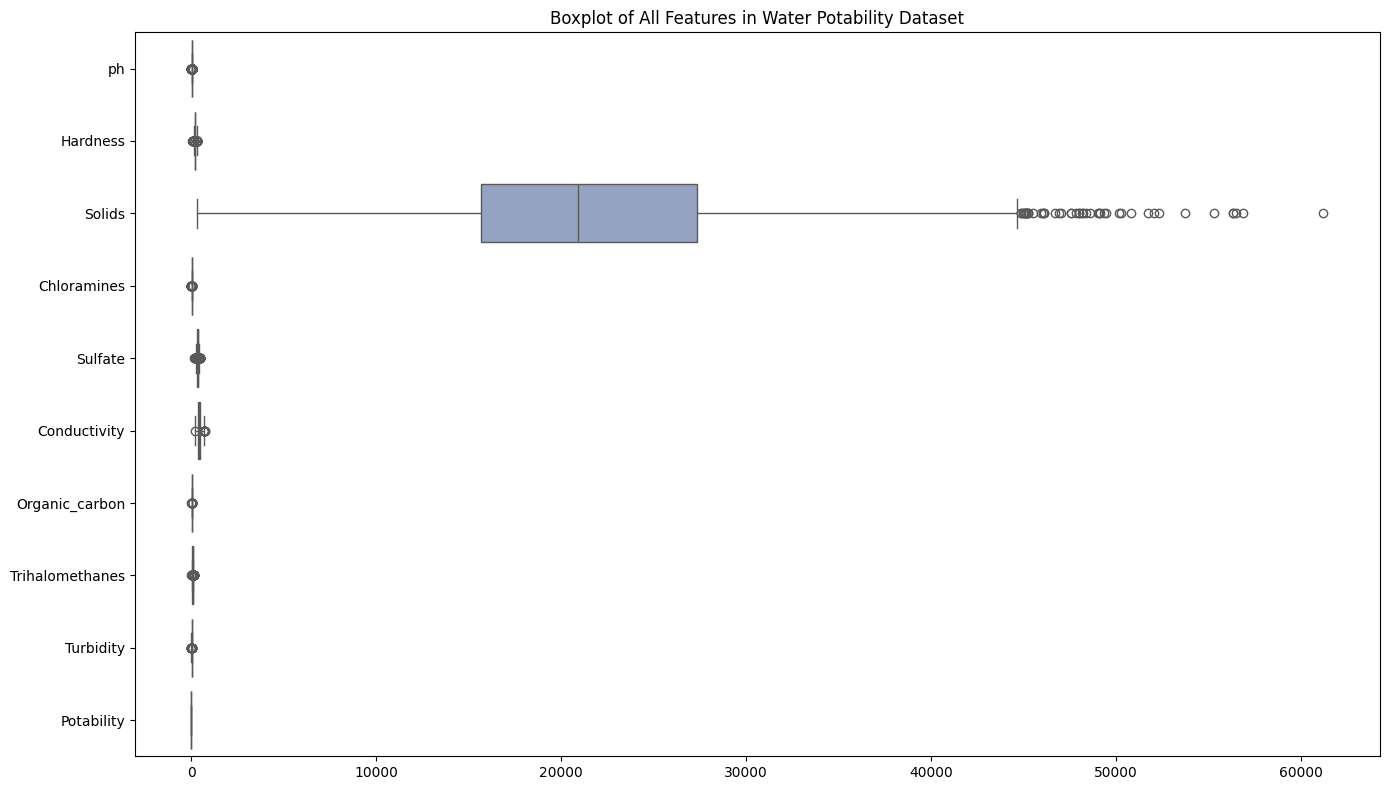

In [67]:
#Analyzing trends and outliers using IQR method
plt.figure(figsize=(14, 8))
sns.boxplot(data= khushi_df, orient="h", palette="Set2")
plt.title("Boxplot of All Features in Water Potability Dataset")
plt.tight_layout()
plt.show()

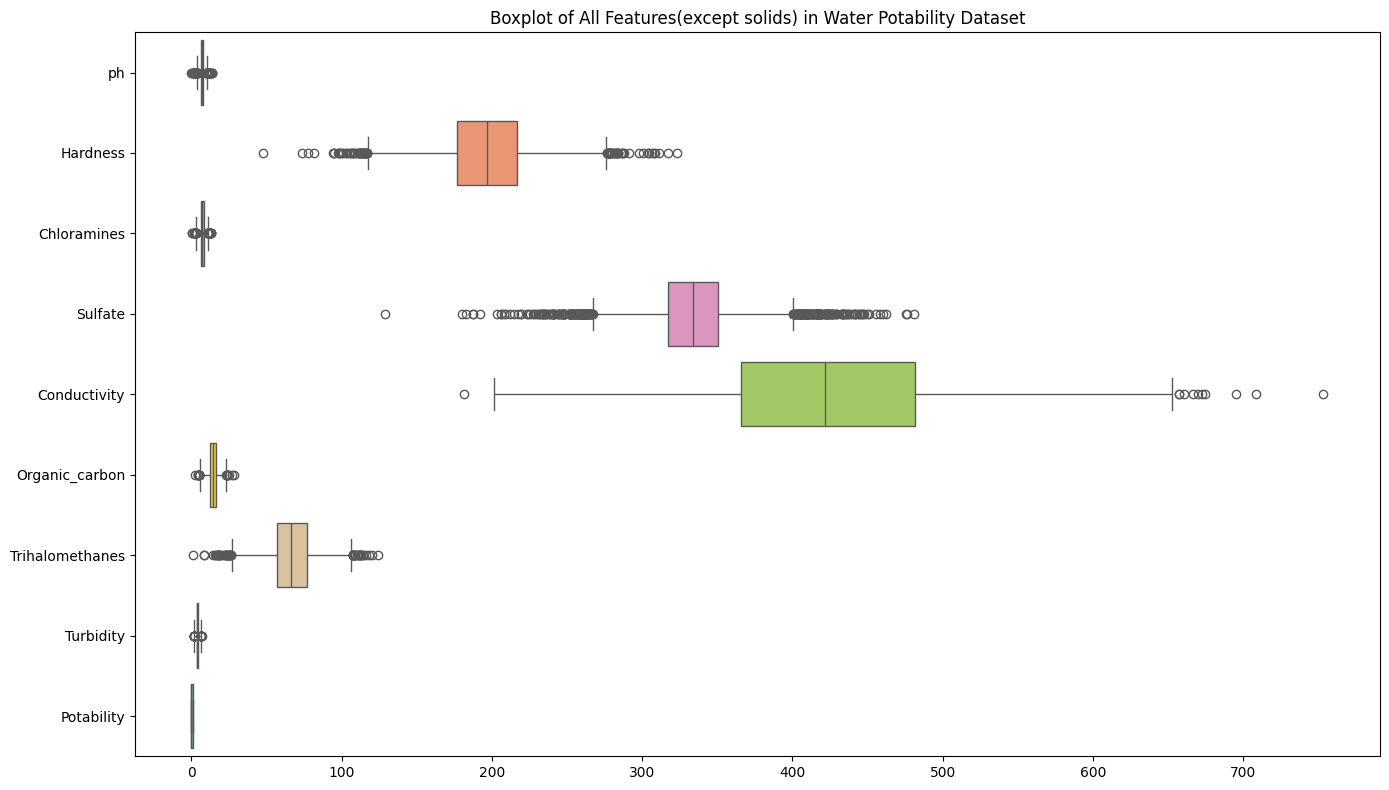

In [68]:
#Boxplot of All Features(except solids)
df = khushi_df.drop("Solids",axis=1)
plt.figure(figsize=(14, 8))
sns.boxplot(data= df, orient="h", palette="Set2")
plt.title("Boxplot of All Features(except solids) in Water Potability Dataset")
plt.tight_layout()
plt.show()

In [61]:
#outlier removal using IQR method
Q1 = khushi_df.quantile(0.25)
Q3 = khushi_df.quantile(0.75)
IQR = Q3 - Q1
khushi_df_cleaned = khushi_df[~((khushi_df < (Q1 - 1.5 * IQR)) | (khushi_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Performing Z-Score Normalization on the features to standardize their values


In [69]:
#feature scaling using Z-score normalization

# Separate features (X) and target variable (y)
X = khushi_df_cleaned.drop('Potability', axis=1) 
y = khushi_df_cleaned['Potability']  

scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled_df.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.005967  0.276380 -0.087788     0.133760  1.311504      1.731801   
1  0.843882  0.958501 -0.199087     1.531834  0.000565     -0.090093   
2  1.022965  0.610743  0.067098     0.670947  0.872634     -0.782072   
3  1.661037 -0.562404 -0.442764    -0.399530 -0.891492     -0.342620   
4 -1.225574 -0.308120  0.916600     0.306890 -0.267256     -1.817403   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.220488         1.379762  -1.312414  
1        0.796898        -0.001226  -1.190445  
2        1.284355         2.276037   0.876799  
3       -0.854093        -2.312089   0.149055  
4       -1.836085        -0.773406  -1.842654

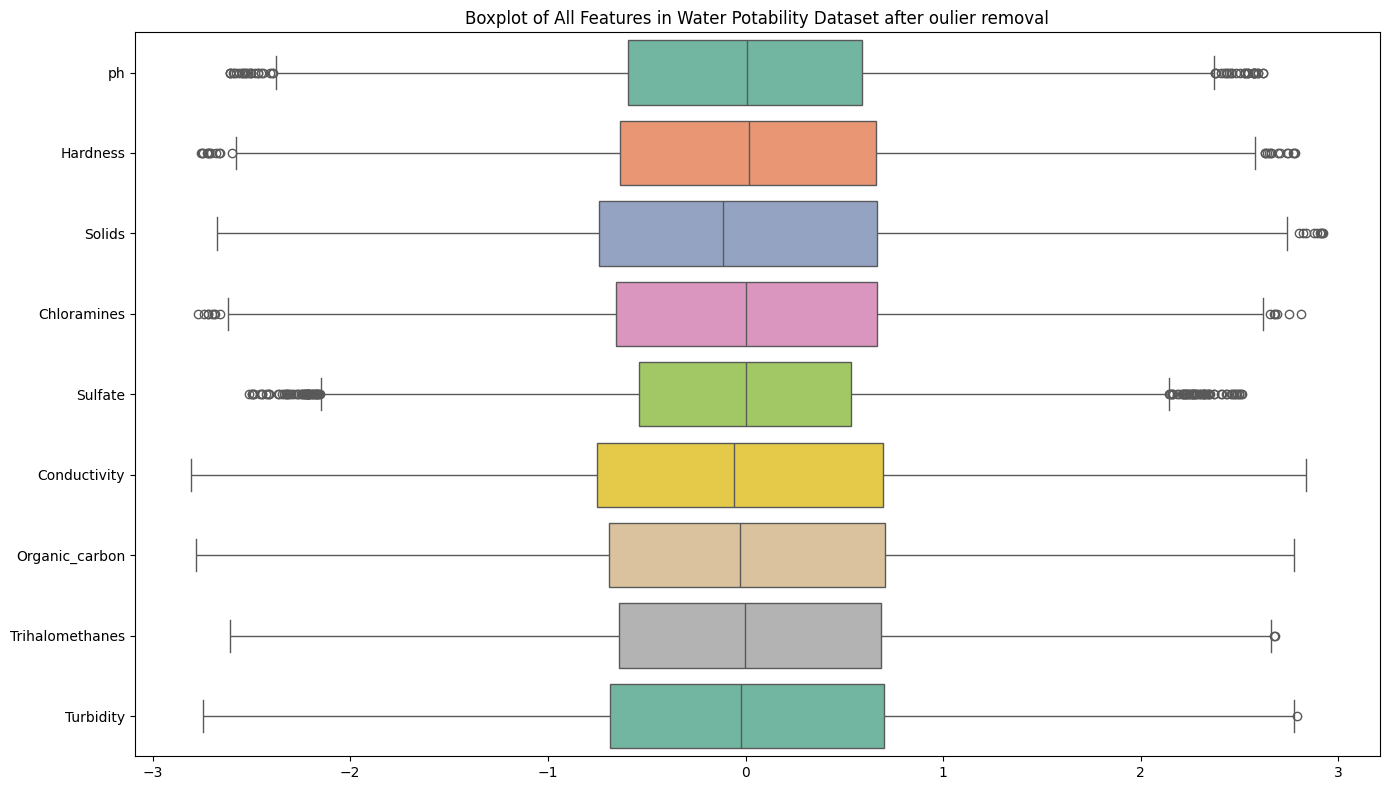

In [58]:
plt.figure(figsize=(14, 8))
sns.boxplot(data= X_scaled_df, orient="h", palette="Set2")
plt.title("Boxplot of All Features in Water Potability Dataset after oulier removal")
plt.tight_layout()
plt.show()

Majority outliers are removed and the data is also scaled which would improve the model performance

In [15]:
x =  X_scaled_df
Y = khushi_df_cleaned['Potability']


In [16]:
x.shape

(2666, 9)

In [17]:
Y.shape

(2666,)

In [18]:
y.value_counts()

Potability
0    1671
1     995
Name: count, dtype: int64

It is clear from the value counts that data for target label 1 are less than target label 0 which makes the dataset unbalanced

In [19]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 34)
X_res, y_res = ros.fit_resample(x, y)


In [20]:
y_res.value_counts()

Potability
0    1671
1    1671
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=34)

# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1866, 9)
X_test shape: (800, 9)
y_train shape: (1866,)
y_test shape: (800,)



== SVM Classifier ==

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       507
           1       0.64      0.23      0.33       293

    accuracy                           0.67       800
   macro avg       0.66      0.58      0.56       800
weighted avg       0.66      0.67      0.62       800



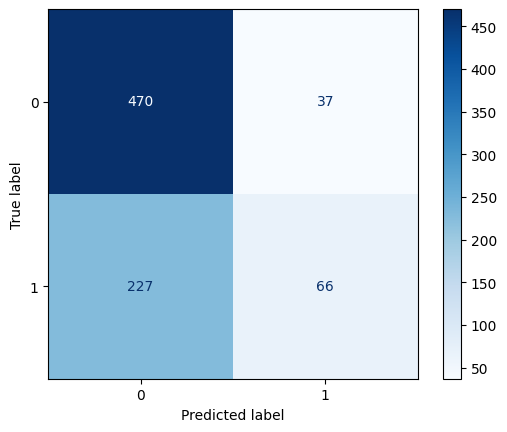


== KNN Classifier ==

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       507
           1       0.48      0.37      0.42       293

    accuracy                           0.62       800
   macro avg       0.58      0.57      0.57       800
weighted avg       0.61      0.62      0.61       800



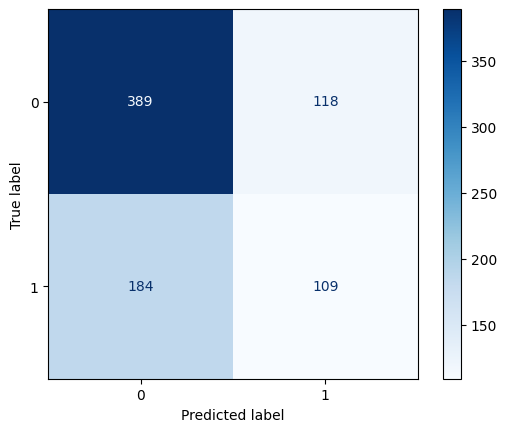


== Logistic Regression Classifier ==

              precision    recall  f1-score   support

           0       0.63      1.00      0.78       507
           1       0.00      0.00      0.00       293

    accuracy                           0.63       800
   macro avg       0.32      0.50      0.39       800
weighted avg       0.40      0.63      0.49       800



C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

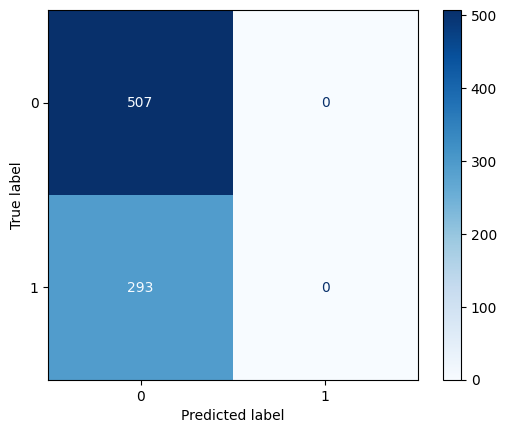


== Decision Tree Classifier ==

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       507
           1       0.42      0.40      0.41       293

    accuracy                           0.58       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.57      0.58      0.58       800



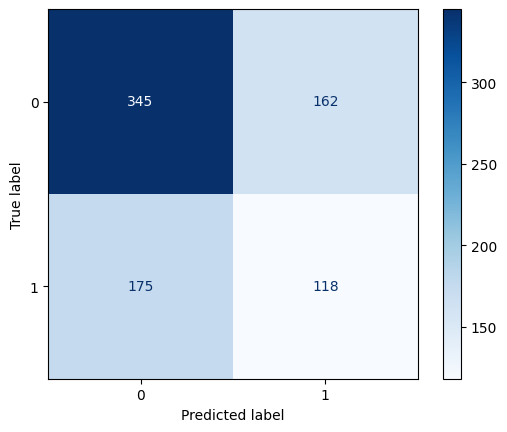


== Random Forest Classifier ==

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       507
           1       0.54      0.26      0.35       293

    accuracy                           0.65       800
   macro avg       0.60      0.56      0.55       800
weighted avg       0.62      0.65      0.61       800



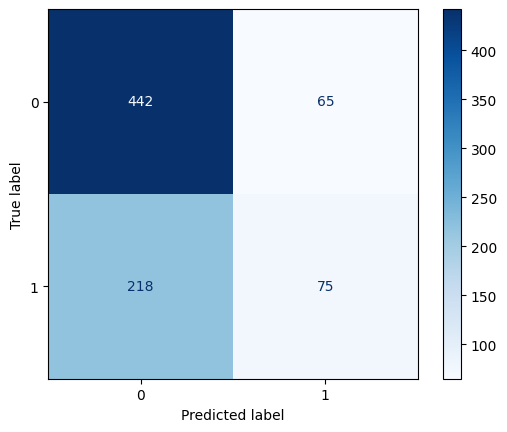


== XGBoost Classifier ==

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       507
           1       0.47      0.34      0.39       293

    accuracy                           0.62       800
   macro avg       0.57      0.56      0.56       800
weighted avg       0.60      0.62      0.60       800



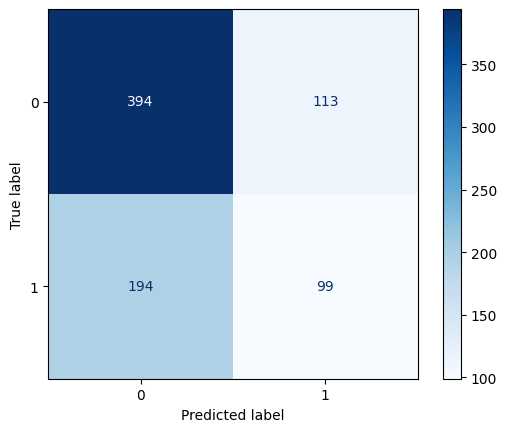

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

classifiers = {
    
    "SVM": SVC(random_state=93),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier()
}

for name, model in classifiers.items():
    print(f"\n== {name} Classifier ==\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.show()

In [23]:
accuracy_scores = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

print("Accuracy scores before hyperparameter tuning:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score:.4f}")

Accuracy scores before hyperparameter tuning:
SVM: 0.6700
KNN: 0.6225
Logistic Regression: 0.6338
Decision Tree: 0.5750
Random Forest: 0.6325
XGBoost: 0.6162


Hyperparameter tuning for all the three best performing models (Random Forest, SVM, Logistic Regression) using GridSearchCV to improve its performance

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


best_models = {}

#Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=93), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
best_models["Random Forest"] = best_rf_model

rf_pred = best_rf_model.predict(X_test)
print("Best Random Forest - Accuracy:", accuracy_score(y_test, rf_pred))
print("Best Random Forest - Classification Report:\n", classification_report(y_test, rf_pred))
print("Best Random Forest - Hyperparameters:", rf_grid_search.best_params_)

#Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm_grid_search = GridSearchCV(SVC(random_state=93), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

best_svm_model = svm_grid_search.best_estimator_
best_models["SVM"] = best_svm_model

svm_pred = best_svm_model.predict(X_test)
print("\nBest SVM - Accuracy:", accuracy_score(y_test, svm_pred))
print("Best SVM - Classification Report:\n", classification_report(y_test, svm_pred))
print("Best SVM - Hyperparameters:", svm_grid_search.best_params_)





Best Random Forest - Accuracy: 0.6525
Best Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.90      0.77       507
           1       0.56      0.23      0.32       293

    accuracy                           0.65       800
   macro avg       0.62      0.56      0.54       800
weighted avg       0.63      0.65      0.60       800

Best Random Forest - Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Best SVM - Accuracy: 0.67
Best SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.93      0.78       507
           1       0.64      0.23      0.33       293

    accuracy                           0.67       800
   macro avg       0.66      0.58      0.56       800
weighted avg       0.66      0.67      0.62       800

Best SVM - Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [32]:
#Logistic Regression 
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=93),
                              lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
lr_grid_search.fit(X_train, y_train)

best_lr_model = lr_grid_search.best_estimator_
best_models["Logistic Regression"] = best_lr_model

lr_pred = best_lr_model.predict(X_test)
print("\nBest Logistic Regression - Accuracy:", accuracy_score(y_test, lr_pred))
print("Best Logistic Regression - Classification Report:\n", classification_report(y_test, lr_pred))
print("Best Logistic Regression - Hyperparameters:", lr_grid_search.best_params_)



Best Logistic Regression - Accuracy: 0.63375
Best Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78       507
           1       0.00      0.00      0.00       293

    accuracy                           0.63       800
   macro avg       0.32      0.50      0.39       800
weighted avg       0.40      0.63      0.49       800

Best Logistic Regression - Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [33]:
# Compare All Best Models Using Accuracy Score
best_model_accuracy_scores = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    best_model_accuracy_scores[name] = accuracy_score(y_test, y_pred)

print("\nAccuracy scores after hyperparameter tuning:")
for name, score in best_model_accuracy_scores.items():
    print(f"{name}: {score:.4f}")


Accuracy scores after hyperparameter tuning:
Random Forest: 0.6525
SVM: 0.6700
Logistic Regression: 0.6338


Hyperparameter tuning for  the SVM and random forest models( two best performing model) using GridSearchCV with KFold cross-validation to improve its performance

In [34]:
from sklearn.model_selection import  KFold

#  Random Forest Classifier 

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=93)

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=93),
    rf_param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_

# Train the model with the best hyperparameters
rf_best_model = RandomForestClassifier(**rf_best_params, random_state=93)
rf_best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
rf_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# Print the results
print("\n=== Random Forest Results ===")
print("Best Hyperparameters:", rf_best_params)
print("Test Accuracy:", rf_accuracy)
print("\nClassification Report:")
print(rf_report)



#Support Vector Machine

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}


svm_grid_search = GridSearchCV(
    SVC(random_state=93, probability=True),  
    svm_param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

svm_grid_search.fit(X_train, y_train)
svm_best_params = svm_grid_search.best_params_

# Train the model with the best hyperparameters
svm_best_model = SVC(**svm_best_params, random_state=93, probability=True)
svm_best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
svm_pred = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

# Print the results
print("\n=== SVM Results ===")
print("Best Hyperparameters:", svm_best_params)
print("Test Accuracy:", svm_accuracy)
print("\nClassification Report:")
print(svm_report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

=== Random Forest Results ===
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       507
           1       0.55      0.26      0.35       293

    accuracy                           0.65       800
   macro avg       0.61      0.57      0.55       800
weighted avg       0.63      0.65      0.61       800

Fitting 5 folds for each of 32 candidates, totalling 160 fits

=== SVM Results ===
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       507
           1       0.64      0.23      0.33       293

    accuracy                           0.67       800
   macro avg   

The performance of models remain the same even after hyperparameter tuning and cross validation

Performing all the models on PCA transformed data and plotting the PCA scree plot (for 3 components)

In [35]:
num_components = 3
pca = PCA(n_components=num_components)
X_test_pca = pca.fit_transform(X_test)
X_train_pca = pca.fit_transform(X_train)

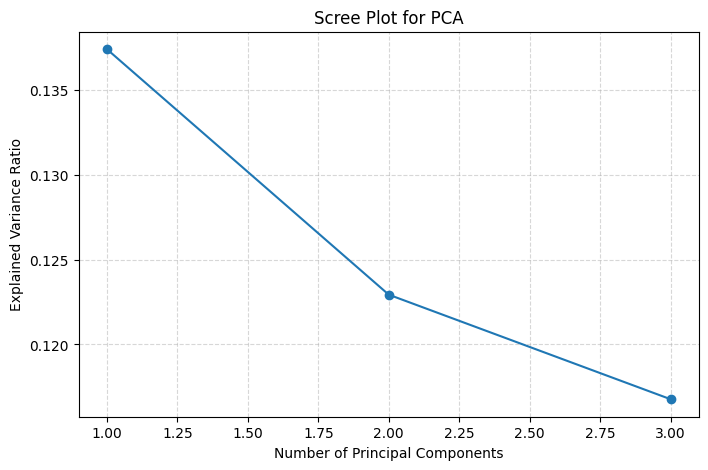

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', label='PCA')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot for PCA")
plt.grid(True, linestyle='--', alpha=0.5)

In [39]:


classifiers = {
    
    "SVM": SVC(random_state=93),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier()
}

for name, model in classifiers.items():
    print(f"\n{name} Classifier:\n")
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    
    print(classification_report(y_test, y_pred_pca))
    
    


SVM Classifier:

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       507
           1       0.00      0.00      0.00       293

    accuracy                           0.63       800
   macro avg       0.32      0.49      0.39       800
weighted avg       0.40      0.63      0.49       800


KNN Classifier:

              precision    recall  f1-score   support

           0       0.63      0.70      0.67       507
           1       0.37      0.30      0.33       293

    accuracy                           0.55       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.54      0.55      0.54       800


Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.63      1.00      0.78       507
           1       0.00      0.00      0.00       293

    accuracy                           0.63       800
   macro avg       0.32      0.50      0.39       800
weig

C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akhus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       507
           1       0.36      0.22      0.27       293

    accuracy                           0.57       800
   macro avg       0.49      0.50      0.48       800
weighted avg       0.53      0.57      0.54       800


XGBoost Classifier:

              precision    recall  f1-score   support

           0       0.64      0.73      0.69       507
           1       0.39      0.30      0.34       293

    accuracy                           0.57       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.55      0.57      0.56       800



The PCA transformed data is performing worse than the original data for all the models so therefore won't proceed with hyperparameter tuning and cross fold validation for the PCA transformed data. We will only focus on the original data and models performed on it.